## Algoritmos Evolutivos: Trabajo Práctico Nº1

Autores: Joaquín Matías Mestanza y Gonzalo Nicolas Silva Caggiano


### Ejercicio 1:

Mediante un algoritmo genético desarrollado en Python encontrar el valor máximo de la función
$
y=x^2
$
a. Indicar el resultado de la solución encontrada (valor de "x") si se ejecutan 10 lanzamientos del algoritmo.
Parámetros:

- Selección por ruleta
- Intervalo de la variable de decisión: [0,31] ∈ Z
- Aplicar elitismo: Sí
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.92
- Probabilidad de mutación: 0.1
- Tamaño de la población: 4
- Generaciones 10


In [1]:
import pandas as pd
import random
import numpy as np

from EvolutionaryAlgorithm import Roulette, EvolutionaryAlgorithm

df = pd.DataFrame()
executions = 10

random.seed(42)
for run in range(executions):

    ea = Roulette(
        generations=10,
        chromosome_length=5,
        population_length=4,
        maximize=True,
        target_fn=lambda x: x**2,
        elitism=True,
        crossover_rate=0.92,
        x_min=0,
        x_max=31,
        mutation_rate=0.1
    )
    ea.execute()
    chromosome, best, fitness = ea.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)      
    
display(df)

,run,best chromosome,best solution,fitness
0,0,11111,31.0,961.0
1,1,11111,31.0,961.0
2,2,11111,31.0,961.0
3,3,11111,31.0,961.0
4,4,11101,29.0,841.0
5,5,11111,31.0,961.0
6,6,11111,31.0,961.0
7,7,11111,31.0,961.0
8,8,11101,29.0,841.0
9,9,11111,31.0,961.0


## Ejercicio 2
Minimizar mediante tres algoritmos genéticos desarrollados en Python la función $
y=x^2
$
a. Indicar el resultado de la solución encontrada (valor de "x") si se ejecutan 3 algoritmos un total de 30 lanzamientos cada uno.
Parámetros:
- Selección por Ranking, Ruleta y Torneo
- Intervalo de la variable de decisión: [-31,31] ∈ R (con un dígito decimal)
- Aplicar elitismo: Sí (Sólo en método ruleta y ranking)
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.85
- Probabilidad de mutación: 0.09
- Tamaño de la población: 4
- Generaciones 10

In [2]:
from EvolutionaryAlgorithm import Roulette
import pandas as pd
import math

executions = 30
x_max = 31
x_min = -31
crossover_rate = 0.85
mutation_rate = 0.09

decimal_places = 1 # .1
bits = math.ceil(np.log2((x_max-x_min) * (10**decimal_places)))

df_roulette = pd.DataFrame()

original_common_params = {
    "generations": 10,
    "chromosome_length": bits, 
    "population_length": 4,
    "maximize": False,
    "target_fn": lambda x:x**2,
    "crossover_rate": crossover_rate,
    "x_min": x_min,
    "x_max": x_max,
    "mutation_rate":mutation_rate,
    "epsilon": 1e-3
}

original_roulette_params = {
    **original_common_params,
    "elitism": True,
}

random.seed(42)
for run in range(executions):
    eaRoulette = Roulette(**original_roulette_params)
    eaRoulette.execute()
    chromosome, best, fitness = eaRoulette.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_roulette = pd.concat([df_roulette, pd.DataFrame([row])], ignore_index=True)      
    
display(df_roulette)

,run,best chromosome,best solution,fitness
0,0,1000000100,0.272727,13.266089
1,1,1000000000,0.030303,521.302058
2,2,1000000000,0.030303,521.302058
3,3,1000001100,0.757576,1.739369
4,4,0111101010,-1.303030,0.588620
5,5,1000000000,0.030303,521.302058
6,6,0111111110,-0.090909,107.939340
7,7,1000010011,1.181818,0.715464
8,8,1000000100,0.272727,13.266089
9,9,1000000010,0.151515,41.741730


In [3]:
from EvolutionaryAlgorithm import LinearRanking
df_linear_ranking = pd.DataFrame()

original_linear_ranking_params = {
    **original_common_params,
    "elitism": True,
}

random.seed(42)
for run in range(executions):
    eaLinearRanking = LinearRanking(**original_linear_ranking_params)
    eaLinearRanking.execute()
    chromosome, best, fitness = eaLinearRanking.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_linear_ranking = pd.concat([df_linear_ranking, pd.DataFrame([row])], ignore_index=True)      
    
# display(df_linear_ranking)

In [4]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()

original_tournament_params = {
    **original_common_params,
    "tournament_size": 3,
    "elitism": False,
}

random.seed(42)
for run in range(executions):
    eaTournament = Tournament(**original_tournament_params)
    eaTournament.execute()
    chromosome, best, fitness = eaTournament.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      

display(df_tournament)

,run,best chromosome,best solution,fitness
0,0,1010000000,7.787879,0.016487
1,1,0111111111,-0.030303,521.302058
2,2,1000000111,0.454545,4.816687
3,3,0111111100,-0.212121,21.741300
4,4,0101111011,-8.030303,0.015507
5,5,1000000110,0.393939,6.402530
6,6,1000000001,0.090909,107.939340
7,7,1000010001,1.060606,0.888190
8,8,1000000010,0.151515,41.741730
9,9,1000000001,0.090909,107.939340


In [5]:
new_df = pd.DataFrame()
new_df["roulette"] = df_roulette["best solution"]
new_df["linear ranking"] = df_linear_ranking["best solution"]
new_df["tournament"] = df_tournament["best solution"]
new_df.index.name = 'run'
display(new_df)

,roulette,linear ranking,tournament
run,,,
0,0.272727,0.272727,7.787879
1,0.030303,0.030303,-0.030303
2,0.030303,0.030303,0.454545
3,0.757576,1.242424,-0.212121
4,-1.303030,-0.454545,-8.030303
5,0.030303,0.030303,0.393939
6,-0.090909,-0.515152,0.090909
7,1.181818,0.696970,1.060606
8,0.272727,0.030303,0.151515


b. (Valor 0.75 puntos) Completar la siguiente tabla en base a las 30
ejecuciones con los parámetros señalados.

In [6]:
comparison = pd.DataFrame()
algorithms = ['LinearRanking', 'Roulette', 'Tournament']
for dataframe, algorithm in zip([df_linear_ranking, df_roulette, df_tournament], algorithms):
    row = {'algorithm': algorithm }
    desc = dataframe['best solution'].describe()
    for statistic in ['min', 'mean', 'max', 'std']:
        row[statistic] = desc[statistic]
    comparison = pd.concat([comparison, pd.DataFrame([row])], ignore_index=True)     
    
display(comparison)

,algorithm,min,mean,max,std
0,LinearRanking,-7.787879,-0.222222,1.969697,1.551871
1,Roulette,-3.060606,0.197980,9.727273,1.958868
2,Tournament,-8.030303,0.248485,7.787879,2.233431


c. (Valor 0.75 puntos) Explicar (en el .pdf) una interpretación de los
resultados obtenidos en el ítem anterior.

Dada la tabla se puede observar lo siguiente: 
- En los 3 tipos de selecciones la media tiende a estar cerca del 0, que es donde está el valor óptimo.
- La velocidad de convergencia hacia un posible mínimo se ve afectada por el algoritmo de selección.
- El algoritmo de selección Tournament es el que más varianza posee de los 3 lo cual sugiere que es el peor.
- La evidencia sugiere que el hecho de aplicar elitismo es mejor para la velocidad de convergencia del algoritmo.




d. (Valor 1 punto) Modificar los parámetros Pm, Tamaño de la población y
Generaciones de modo tal que se consiga encontrar una combinación
que permita obtener el mejor valor óptimo y su correspondiente solución
(para cada algoritmo habrá una combinación diferente). Transcribir las
combinaciones encontradas en el .pdf.



In [7]:
possible_values = np.linspace(x_min, x_max, 2**bits)
idx = next(i for i in range(len(possible_values)) if possible_values[i] > 0)
optimal_solutions = (possible_values[idx-1:idx+1])
print(optimal_solutions)

[-0.03030303  0.03030303]


Veamos cual es el valor óptimo de fitness para las soluciones óptimas

In [8]:
from EvolutionaryAlgorithm import EvolutionaryAlgorithm
ea_util = EvolutionaryAlgorithm(**original_roulette_params)
best_possible = ea_util.fitness(ea_util.dec_to_bin(optimal_solutions[0]))
best_possible

521.3020584011347

Text(0, 0.5, 'Fitness')

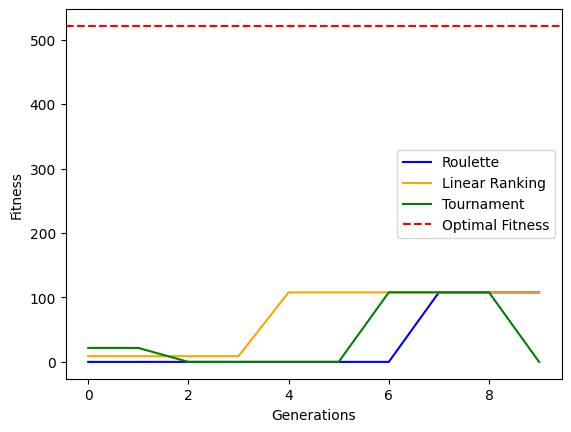

In [9]:
import matplotlib.pyplot as plt 

models = [Roulette, LinearRanking, Tournament]
original_params = [original_roulette_params, original_linear_ranking_params, original_tournament_params]
colors = ['blue', 'orange', 'green']

random.seed(31)
for model, params, color in zip(models, original_params, colors):
    ea = model(**params)
    ea.execute()
    generations = params["generations"]
    x_axis = range(generations)
    y_axis = [ea.fitness(ea.generation_best[i]) for i in range(generations)]
    plt.plot(x_axis, y_axis, color=color, label=ea.model_name)

plt.axhline(y=best_possible, linestyle='--', color='red', label='Optimal Fitness')
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Fitness')
     

Búsqueda de hiperparámetros:



[0.05       0.06111111 0.07222222 0.08333333 0.09444444 0.10555556
 0.11666667 0.12777778 0.13888889 0.15      ]
[4, 6, 8, 10, 12, 14, 16, 18]
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]


Text(0, 0.5, 'Fitness')

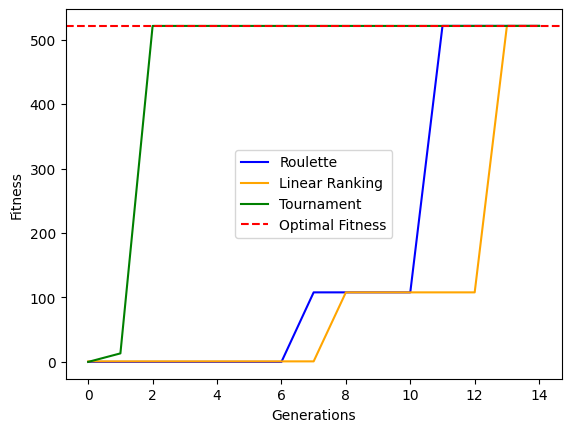

In [10]:

pms = np.linspace(start=0.05, stop=0.15, num=10) # pms chicos
population_sizes = list(range(4,20,2))
generations_num = list(range(5,60,5))

print(pms)
print(population_sizes)
print(generations_num)
found_optimal = {}

for pm in pms: 
    for p_size in population_sizes:
        for generation_num in generations_num: 
            random.seed(31)
            for model, params, color in zip(models, original_params, colors):
                new_params = {
                    **params,
                    "population_length": p_size,
                    "generations": generation_num,
                    "mutation_rate": pm
                }
                ea = model(**new_params)
                if ea.model_name not in found_optimal:
                    best_chromosome = ea.execute()
                    if ea.fitness(best_chromosome) == best_possible:
                        y_axis = list(map(ea.fitness, ea.generation_best))
                        plt.plot(y_axis, color=color, label=ea.model_name)
                        found_optimal[ea.model_name] = True

plt.axhline(y=best_possible, linestyle='--', color='red', label='Optimal Fitness')
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Fitness')

Con Roulette y Linear Ranking se consiguió las dos posibles soluciones óptimas con:
- Pm=0.09
- Generaciones=10
- Tamaño de población=4

Así que resta conseguir para Tournament.

In [11]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()
for run in range(executions):

    eaTournament2 = Tournament(
        tournament_size=3,
        generations=30,
        chromosome_length=bits, 
        population_length=10,
        maximize=False,
        target_fn=lambda x:x**2,
        elitism=False,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaTournament2.execute()
    chromosome, best, fitness = eaTournament2.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      
    
display(df_tournament)

,run,best chromosome,best solution,fitness
0,0,0111111010,-0.333333,8.919722
1,1,0111111111,-0.030303,521.302058
2,2,0111111111,-0.030303,521.302058
3,3,1000000000,0.030303,521.302058
4,4,1000000000,0.030303,521.302058
5,5,1000001011,0.696970,2.054372
6,6,1000000000,0.030303,521.302058
7,7,0111111111,-0.030303,521.302058
8,8,1000000111,0.454545,4.816687
9,9,0111111111,-0.030303,521.302058


Después de cambiar 
- Generaciones: 30
- Tamaño de población:4 

el algoritmo llegó a la solución óptima.

e. (Valor 0.5 puntos) Realizar 6 curvas de convergencia; 3 correspondientes
a los algoritmos con los parámetros originales y 3 correspondientes a los
algoritmos con los mejores parámetros encontrados en el ítem d. Mostrar
las 6 curvas en el .pdf. Las curvas deben contener título, leyenda y
etiquetas en los ejes.



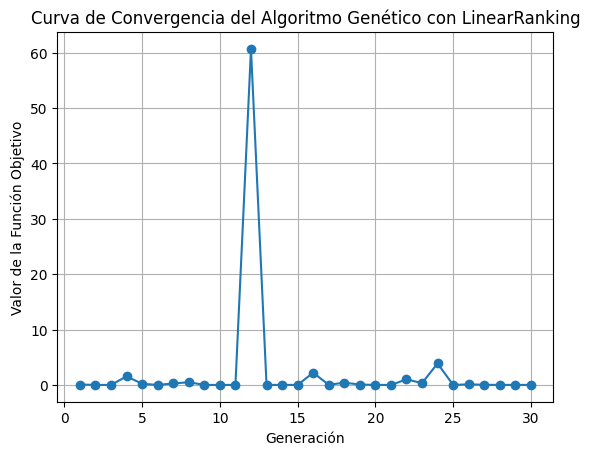

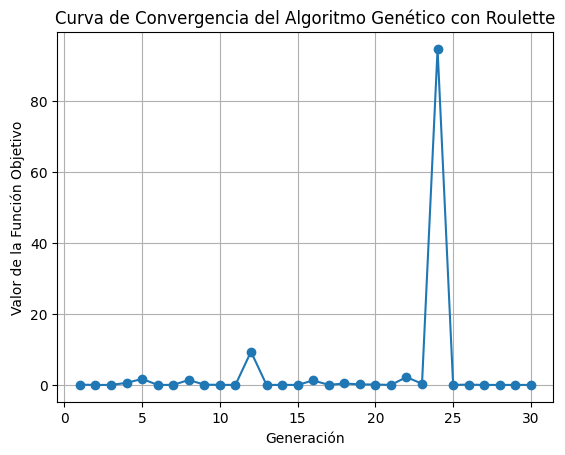

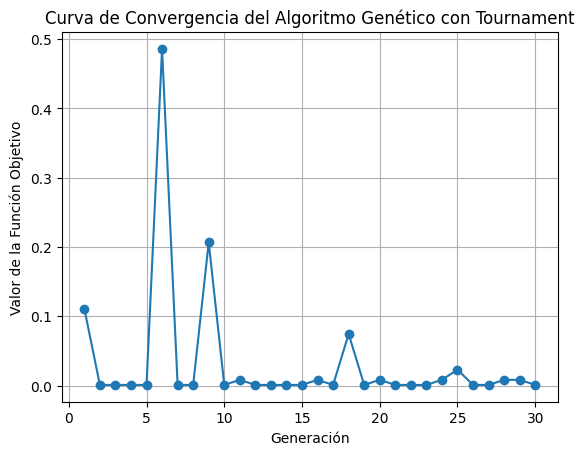

In [12]:
import matplotlib.pyplot as plt
for df, algorithm in zip([df_linear_ranking, df_roulette, df_tournament], algorithms):
    x = df['run']
    y = df['best solution']

    plt.plot(range(1, len(x) + 1), [w**2 for w in y], marker='o')
    plt.xlabel('Generación')
    plt.ylabel('Valor de la Función Objetivo')
    plt.title(f'Curva de Convergencia del Algoritmo Genético con {algorithm}')
    plt.grid(True)
    plt.show()

f. (Valor 0.5 puntos) Interpretar tanto las combinaciones de parámetros
encontradas en cada uno de los 3 algoritmos como sus graficas de
convergencia en el ítem anterior y explicarlas en el .pdf.

## Ejercicio 3

La distribución de la concentración de cierto contaminante en un canal está
descrita por la ecuación:

$$
c(x,y) = 7.7 + 0.15x + 0.22y - 0.05x^2 -0.016y^2-0.007xy
$$

En donde, las variables independientes se encuentran entre los límites de –10 ≤
x ≤ 10, 0 ≤ y ≤ 20.
Para la función de adaptación anterior, escribir y ejecutar dos algoritmos
genéticos que utilicen el operador de selección por ruleta y torneo
respectivamente con probabilidades de cruza y mutación a elección. Luego
realizar las siguientes consignas para ambos algoritmos:

Cómo serian los nuevos x_max y x_min?

- Hacemos de cuenta que el problema original se trata de un solo cromosoma de 30 bits.
- No hace falta un remappeo de los bits a un nuevo x_max y x_min ya que usando los bits del cromosoma ya sabemos como evaluar la función objetivo.
Es por eso que el nuevo intervalo de "x_min" y "x_max" es de $[0, 2^{totalbits} -1]$


Para no cambiar los algoritmos ya implementados, decidimos ajustar la target function.
Para escribir código de forma limpia y realizar calculos internos se creó la clase BivariateTargetFun.

In [13]:
from EvolutionaryAlgorithm import BivariateTargetFun
bivariate = BivariateTargetFun(x1_min=-10, x1_max=10, x2_min=0, x2_max=20, decimal_places=3)

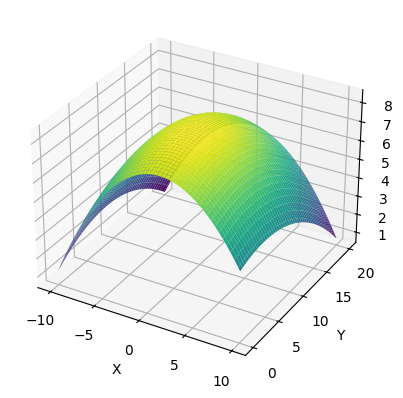

In [14]:
bivariate.plot_function()

Se sabe que el óptimo en esta región es con 
- x$\approx$1.03
- y$\approx$6.65

Da un valor fitness$\approx$8.51


In [15]:
from EvolutionaryAlgorithm import Roulette, BivariateTargetFun
import pandas as pd

bivariate = BivariateTargetFun(x1_min=-10, x1_max=10, x2_min=0, x2_max=20, decimal_places=3)

executions = 30
df = pd.DataFrame()
for run in range(executions):

    ea = Roulette(
        generations=10,
        chromosome_length=bivariate.total_bits,
        population_length=4,
        maximize=True,
        target_fn=bivariate.target_fun,
        elitism=True,
        crossover_rate=0.9,
        x_min=0,
        x_max=2**bivariate.total_bits-1,
        mutation_rate=0.1
    )
    ea.execute()
    chromosome, best, fitness = ea.get_best_individual()
    _x,_y = bivariate.split_answer(chromosome)
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "x(best)": _x, "y(best)": _y, "fitness": fitness}
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)      
    
display(df)

,run,best chromosome,best solution,x(best),y(best),fitness
0,0,100000011011110010101101010011,544156499.0,0.135807,6.769616,8.469086
1,1,100010100110101010111100010110,580562710.0,0.813929,7.357402,8.499573
2,2,100011000001100010011100010001,587605777.0,0.945158,6.104312,8.503467
3,3,100011100001010010110000110011,595930163.0,1.100192,6.906339,8.507554
4,4,100010010001000001111100101111,574889775.0,0.708335,4.872585,8.449099
5,5,100101101110110001101101110010,633019250.0,1.791131,4.288461,8.403701
6,6,100100100110011010011111011110,614049758.0,1.437727,6.229438,8.499194
7,7,100011001010010010101101011010,589900634.0,0.987884,6.773888,8.508631
8,8,100011010111111010011110101010,593471402.0,1.054415,6.197699,8.505738
9,9,011111011110000010100111101110,527968750.0,-0.165716,6.551714,8.435947


In [16]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()
for run in range(executions):

    eaTournament2 = Tournament(
        tournament_size=3,
        generations=30,
        chromosome_length=bivariate.total_bits, 
        population_length=4,
        maximize=True,
        target_fn=bivariate.target_fun,
        elitism=False,
        crossover_rate=crossover_rate,
        x_min=0,
        x_max=2**bivariate.total_bits-1,
        mutation_rate=mutation_rate
    )
    eaTournament2.execute()
    chromosome, best, fitness = eaTournament2.get_best_individual()
    _x,_y = bivariate.split_answer(chromosome)
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "x(best)": _x, "y(best)": _y, "fitness": fitness}
    
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      
    
display(df_tournament)

,run,best chromosome,best solution,x(best),y(best),fitness
0,0,100011001011100011000011101111,590229743.0,0.993988,7.646107,8.493233
1,1,100011000011011010100111111000,588098040.0,0.954314,6.557817,8.508444
2,2,100011110011110010011001000001,600778305.0,1.190527,5.977355,8.501256
3,3,100010010110111010100111110000,576432624.0,0.737022,6.552934,8.504176
4,4,100010101111000010110000110111,582757431.0,0.854823,6.908780,8.506579
5,5,100010010111010001110110010000,576527760.0,0.738853,4.619282,8.434480
6,6,100000110001110010111000101111,549924399.0,0.243233,7.216407,8.475625
7,7,011111101001111010000101111110,531079550.0,-0.107730,5.233314,8.400335
8,8,100000100000011010101100000101,545368837.0,0.158391,6.722007,8.470927
9,9,100111011100101001111001110111,661823095.0,2.327647,4.760277,8.385385
